In [149]:
import pandas as pd
import numpy as np
import json
import re
import ast
import matplotlib.pyplot as plt
import random
import json

# Grabbing Top 1000 Games

In [150]:
games_df = pd.read_csv("../../data/game_player_cnt_ranked_top_1k.csv")
games_df

appid                               name  player_count  result
0       730                   Counter-Strike 2      682378.0       1
1       570                             Dota 2      284438.0       1
2    578080                PUBG: BATTLEGROUNDS      207046.0       1
3    252490                               Rust      100213.0       1
4    359550  Tom Clancy's Rainbow Six® Siege X       82809.0       1
..      ...                                ...           ...     ...
995  315660                  Trainz: A New Era          67.0       1
996  441550               STAR WARS™ Rebellion          67.0       1
997  302510                  Ryse: Son of Rome          67.0       1
998  423580                   Project Highrise          67.0       1
999  294860               Valkyria Chronicles™          67.0       1

[1000 rows x 4 columns]

In [151]:
def get_appids(df, sort=False):
    if sort:
        return sorted(df['appid'].drop_duplicates().tolist())
    else:
        return df['appid'].drop_duplicates().tolist()
    
# get_appids(games_df, sort=True)

# Grabbing User Owned Games

In [152]:
owned_games_df = pd.read_csv("../../data/users_owned_games.csv")
owned_games_df

user_steamid                                   user_owned_games
0     76561198974520522  [{'appid': 10, 'name': 'Counter-Strike', 'play...
1     76561197998402402  [{'appid': 240, 'name': 'Counter-Strike: Sourc...
2     76561199619911485  [{'appid': 552990, 'name': 'World of Warships'...
3     76561198071790564  [{'appid': 4000, 'name': "Garry's Mod", 'playt...
4     76561198047179576  [{'appid': 7670, 'name': 'BioShock', 'playtime...
...                 ...                                                ...
4327  76561199684778078  [{'appid': 70, 'name': 'Half-Life', 'playtime_...
4328  76561198107006111  [{'appid': 30, 'name': 'Day of Defeat', 'playt...
4329  76561198411669195  [{'appid': 4000, 'name': "Garry's Mod", 'playt...
4330  76561198070842180  [{'appid': 10, 'name': 'Counter-Strike', 'play...
4331  76561197960613683  [{'appid': 10, 'name': 'Counter-Strike', 'play...

[4332 rows x 2 columns]

# Creating Player "Ratings" Table
- We're treating the player's time played as their "rating"

In [153]:
def get_player_ratings(row, all_appids):
    print(f"user: {row['user_steamid']}")

    # getting owned games
    owned_games = row['user_owned_games']
    matches = re.findall(r'\{(.*?)\}', owned_games)

    # defining important columns
    important_cols = ['appid', 'playtime_forever']
    # important_cols = ['appid', 'name', 'playtime_forever']

    # creating dataframe from owned games list of dicts
    data = [tuple([ast.literal_eval("{"+j+"}")[i] for i in important_cols]) for j in matches]
    df = pd.DataFrame(data, columns=important_cols)

    # filter out any games that are not in the top 1000 games
    df = df[df['appid'].isin(all_appids)].set_index(['appid'])

    # creating series with games played by user
    playertime_ser = df['playtime_forever']

    # creating series with all games
    full_ser = pd.Series(data=[0 for i in range(1000)], index=all_appids, name=row['user_steamid'])
    
    for ind in playertime_ser.index:
        full_ser[ind] = playertime_ser[ind]
    
    return full_ser

data_df = owned_games_df.apply(lambda x: get_player_ratings(x, get_appids(games_df, sort=True)), axis=1)
data_df = pd.concat([owned_games_df[['user_steamid']], data_df], axis=1)
data_df
# data_df.to_csv("../../data/user_game_playtimes.csv", index=False)

user: 76561198974520522
user: 76561197998402402
user: 76561199619911485
user: 76561198071790564
user: 76561198047179576
user: 76561198006449401
user: 76561198052055300
user: 76561199519718088
user: 76561198142997163
user: 76561198032573613
user: 76561198421095654
user: 76561198131078852
user: 76561199270591367
user: 76561198003506436
user: 76561198326673989
user: 76561198918103611
user: 76561199175636048
user: 76561198373919637
user: 76561197995805783
user: 76561199083197516
user: 76561198261635087
user: 76561198292480887
user: 76561199279858186
user: 76561198381900120
user: 76561199471704263
user: 76561199678535611
user: 76561198070333265
user: 76561199834510455
user: 76561198084382139
user: 76561198053710885
user: 76561198384373251
user: 76561197983747223
user: 76561198093868592
user: 76561198099912234
user: 76561198979383788
user: 76561197969153266
user: 76561197993582001
user: 76561198112609591
user: 76561197999542240
user: 76561197991197104
user: 76561198080399449
user: 7656119885

user_steamid   10  20  30   50   70  80  90  211  218  ...  718670  \
0     76561198974520522    1  82   0  458  802   0   0    0    0  ...       0   
1     76561197998402402    0   0   0    0    0   0   0    0    0  ...       0   
2     76561199619911485    0   0   0    0    0   0   0    0    0  ...       0   
3     76561198071790564  895   0   0    0    0  13   0    0    0  ...       0   
4     76561198047179576    0   0   0    0    0   0   0    0    0  ...       0   
...                 ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...     ...   
4327  76561199684778078    0   0   0    0  802   0   0    0    0  ...       0   
4328  76561198107006111  258   0   0    0    0   0   0    0    0  ...       0   
4329  76561198411669195    0   0   0    0    0   0   0    0    0  ...       0   
4330  76561198070842180    0   0   0    0  539   0   0    0    0  ...       0   
4331  76561197960613683    0   0   0    0    0   0   0    0    0  ...       0   

      718850  719040  719640  719890  720620  728530  728880  729040  731490  
0          0     458       0       0       0       0       0       0       0  
1          0       0       0       0       0       0       0      63      25  
2          0       0       0       0       0       0       0       0       0  
3          0       0       0       0       0       0       0       0       0  
4          0       0       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
4327       0       0       0       0       0       0       0       0       0  
4328       0       0       0       0       0       0       0       0       0  
4329       0       0       0       0       0       0       0       0       0  
4330       0       0       0       0       0       0       0       0       0  
4331       0       0       0       0       0       0       0       0       0  

[4332 rows x 1001 columns]

In [154]:
"""
TODO:
    - Convert playtimes into discrete scores (1-5 five stars for instance)
    - Split data into train/test sets
    - (See if we can get temporal data with games owned)
    - Test content based recommender (with and without images)
"""

'\nTODO:\n    - Convert playtimes into discrete scores (1-5 five stars for instance)\n    - Split data into train/test sets\n    - (See if we can get temporal data with games owned)\n    - Test content based recommender (with and without images)\n'

# Analyze user_game_playtimes.csv

In [155]:
df = pd.read_csv("../../data/user_game_playtimes.csv").drop(columns=['Unnamed: 0']).set_index(["user_steamid"])

# drop players who've played no games
temp_ser = (df.sum(axis=1)==0)
valid_users = [i for i in temp_ser.index if bool(temp_ser[i]) == False]

df = df.loc[valid_users]
df

10  20  30   50   70  80  90  211  218   220  ...  718670  \
user_steamid                                                      ...           
76561198974520522    1  82   0  458  802   0   0    0    0  1987  ...       0   
76561197998402402    0   0   0    0    0   0   0    0    0   778  ...       0   
76561199619911485    0   0   0    0    0   0   0    0    0     0  ...       0   
76561198071790564  895   0   0    0    0  13   0    0    0     0  ...       0   
76561198047179576    0   0   0    0    0   0   0    0    0     0  ...       0   
...                ...  ..  ..  ...  ...  ..  ..  ...  ...   ...  ...     ...   
76561198026208991    8   0   0    0  950   0   0    0    0  1547  ...       0   
76561199684778078    0   0   0    0  802   0   0    0    0  1197  ...       0   
76561198107006111  258   0   0    0    0   0   0    0    0     0  ...       0   
76561198411669195    0   0   0    0    0   0   0    0    0     0  ...       0   
76561198070842180    0   0   0    0  539   0   0    0    0   236  ...       0   

                   718850  719040  719640  719890  720620  728530  728880  \
user_steamid                                                                
76561198974520522       0     458       0       0       0       0       0   
76561197998402402       0       0       0       0       0       0       0   
76561199619911485       0       0       0       0       0       0       0   
76561198071790564       0       0       0       0       0       0       0   
76561198047179576       0       0       0       0       0       0       0   
...                   ...     ...     ...     ...     ...     ...     ...   
76561198026208991       0       0       0       0       0       0       0   
76561199684778078       0       0       0       0       0       0       0   
76561198107006111       0       0       0       0       0       0       0   
76561198411669195       0       0       0       0       0       0       0   
76561198070842180       0       0       0       0       0       0       0   

                   729040  731490  
user_steamid                       
76561198974520522       0       0  
76561197998402402      63      25  
76561199619911485       0       0  
76561198071790564       0       0  
76561198047179576       0       0  
...                   ...     ...  
76561198026208991       0       0  
76561199684778078       0       0  
76561198107006111       0       0  
76561198411669195       0       0  
76561198070842180       0       0  

[3859 rows x 1000 columns]

In [156]:
# Find the Average Playtime
total_play_min = df.sum().sum()
num_user = df.shape[0]

avereage_playtime = total_play_min / num_user
print(f"avereage_playtime: {avereage_playtime}")

avereage_playtime: 392149.88546255504


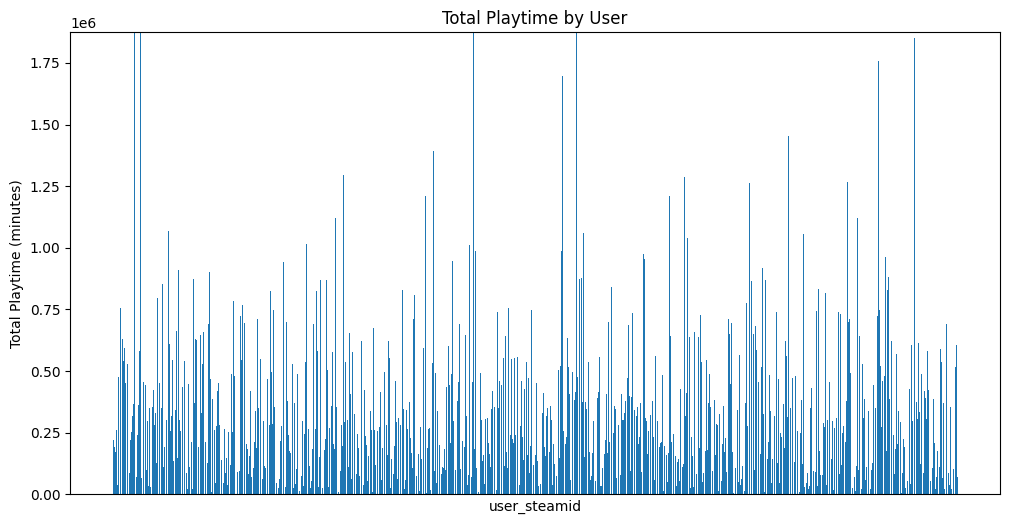

In [157]:
import matplotlib.pyplot as plt

user_playtime_sum = df.sum(axis=1)

plt.figure(figsize=(12, 6))
plt.bar(df.index.astype(str), user_playtime_sum)
plt.ylim(0, user_playtime_sum.quantile(0.99))
plt.xlabel('user_steamid')
plt.ylabel('Total Playtime (minutes)')
plt.title('Total Playtime by User')
plt.xticks([], [])  # Hide x-axis labels for readability
plt.show()

In [158]:
# Find the Average Playtime by player
avg_playtime_per_player = (df.sum(axis=1) / df[(df!=0)].count(axis=1))
avg_playtime_per_player

user_steamid
76561198974520522    2721.053571
76561197998402402     556.394872
76561199619911485     229.333333
76561198071790564    4422.575758
76561198047179576    6650.859649
                        ...     
76561198026208991    3674.845070
76561199684778078    1824.720000
76561198107006111    2012.328358
76561198411669195    1026.768116
76561198070842180    8574.506849
Length: 3859, dtype: float64

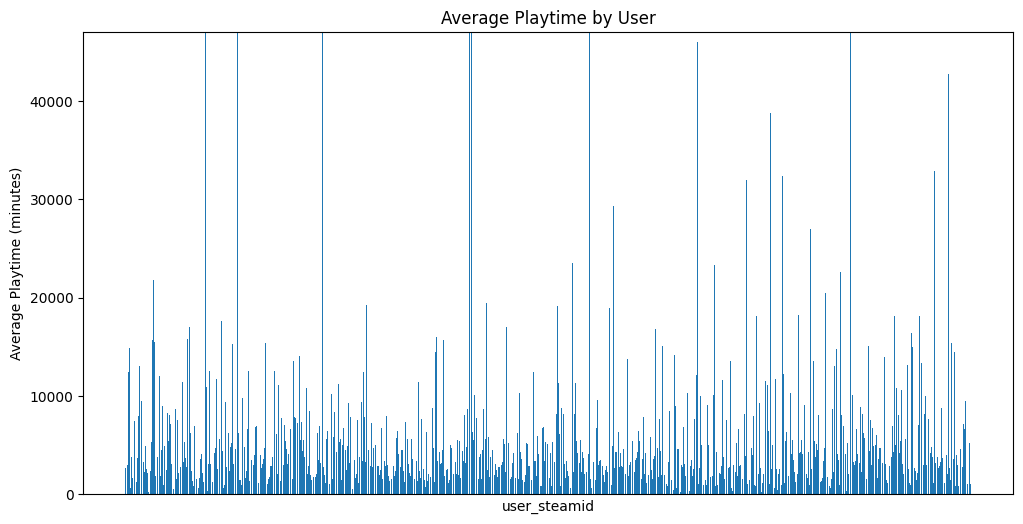

In [159]:
plt.figure(figsize=(12, 6))
plt.bar(avg_playtime_per_player.index.astype(str), avg_playtime_per_player)
plt.ylim(0, avg_playtime_per_player.quantile(0.99))
plt.xlabel('user_steamid')
plt.ylabel('Average Playtime (minutes)')
plt.title('Average Playtime by User')
plt.xticks([], [])  # Hide x-axis labels for readability
plt.show()

In [164]:
"""Find number of games each user has played (in our dataset)"""
df
# avg_playtime_per_player = (df.sum(axis=1) / df[(df!=0)].count(axis=1))
df[(df!=0)].count(axis=1).sort_values()

user_steamid
76561199061386330      1
76561198427539619      1
76561199797332632      1
76561199240876013      1
76561199382275381      1
                    ... 
76561198053710885    564
76561198015514779    566
76561198020125851    566
76561197986603983    593
76561198367471798    638
Length: 3859, dtype: int64

# Split Data

In [118]:
df = pd.read_csv("../../data/user_game_playtimes.csv").drop(columns=['Unnamed: 0']).set_index(["user_steamid"])

# drop players who've played no games
temp_ser = (df.sum(axis=1)==0)
valid_users = [i for i in temp_ser.index if bool(temp_ser[i]) == False]

df = df.loc[valid_users]
df

10  20  30   50   70  80  90  211  218   220  ...  718670  \
user_steamid                                                      ...           
76561198974520522    1  82   0  458  802   0   0    0    0  1987  ...       0   
76561197998402402    0   0   0    0    0   0   0    0    0   778  ...       0   
76561199619911485    0   0   0    0    0   0   0    0    0     0  ...       0   
76561198071790564  895   0   0    0    0  13   0    0    0     0  ...       0   
76561198047179576    0   0   0    0    0   0   0    0    0     0  ...       0   
...                ...  ..  ..  ...  ...  ..  ..  ...  ...   ...  ...     ...   
76561198026208991    8   0   0    0  950   0   0    0    0  1547  ...       0   
76561199684778078    0   0   0    0  802   0   0    0    0  1197  ...       0   
76561198107006111  258   0   0    0    0   0   0    0    0     0  ...       0   
76561198411669195    0   0   0    0    0   0   0    0    0     0  ...       0   
76561198070842180    0   0   0    0  539   0   0    0    0   236  ...       0   

                   718850  719040  719640  719890  720620  728530  728880  \
user_steamid                                                                
76561198974520522       0     458       0       0       0       0       0   
76561197998402402       0       0       0       0       0       0       0   
76561199619911485       0       0       0       0       0       0       0   
76561198071790564       0       0       0       0       0       0       0   
76561198047179576       0       0       0       0       0       0       0   
...                   ...     ...     ...     ...     ...     ...     ...   
76561198026208991       0       0       0       0       0       0       0   
76561199684778078       0       0       0       0       0       0       0   
76561198107006111       0       0       0       0       0       0       0   
76561198411669195       0       0       0       0       0       0       0   
76561198070842180       0       0       0       0       0       0       0   

                   729040  731490  
user_steamid                       
76561198974520522       0       0  
76561197998402402      63      25  
76561199619911485       0       0  
76561198071790564       0       0  
76561198047179576       0       0  
...                   ...     ...  
76561198026208991       0       0  
76561199684778078       0       0  
76561198107006111       0       0  
76561198411669195       0       0  
76561198070842180       0       0  

[3859 rows x 1000 columns]

In [148]:
random.seed(42)

# using split_pct
split_pct = 0.5
train_set = dict()
test_set = dict()

for ind in df.index:
    temp_ser = df.loc[ind]
    user_id = temp_ser.name
    temp_ser = temp_ser[temp_ser!=0]
    games_played = temp_ser.to_dict()

    # splitting data
    num_training_samples = int(len(games_played) * split_pct)
    train_ids = random.sample(list(games_played.keys()), num_training_samples)
    test_ids = [i for i in list(games_played.keys()) if i not in train_ids]
    train_set[str(user_id)] = {i: games_played[i] for i in train_ids}
    test_set[str(user_id)] = {i: games_played[i] for i in test_ids}

print(train_set)
print(test_set)

# saving training data
with open("../../data/offline_evaluation/train.json", "w+") as f:
    json.dump(train_set, f)

# saving test data
with open("../../data/offline_evaluation/test.json", "w+") as f:
    json.dump(test_set, f)

{'76561198974520522': {'362890': 1047, '400': 132, '20': 82, '482400': 1122, '4570': 1844, '4000': 14150, '2600': 110, '500': 3, '602960': 205, '300': 1, '392110': 266, '268650': 67, '240': 28, '334920': 1702, '211820': 40480, '50': 458, '632360': 327, '460950': 228, '2320': 703, '528230': 111, '254700': 802, '346010': 226, '2310': 103, '108600': 222, '291550': 67, '225840': 16, '4580': 4, '488860': 7697}, '76561197998402402': {'240': 3059, '56400': 532, '610080': 18, '291480': 42, '239140': 206, '224260': 42, '55230': 233, '205100': 39, '238960': 12266, '24200': 181, '17480': 21, '261640': 43, '20920': 1473, '245170': 40, '239160': 161, '476600': 90, '219990': 539, '4570': 90, '310950': 81, '386360': 4759, '35140': 577, '261570': 64, '15370': 1, '393380': 32, '227300': 38, '526870': 496, '489830': 140, '246420': 59, '438040': 17, '203160': 318, '8870': 38, '588430': 17, '208650': 564, '226840': 68, '563560': 16, '209000': 436, '22490': 25, '637090': 125, '678800': 25, '307780': 347, '